In [1]:
from dl_solver import Config, JigsawDataset
from data_handling import ImageNetParser
import pandas as pd
import seaborn as sns

/home/duchsche/miniconda3/envs/prj-robotik/lib/python3.12/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_viz_dir" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
config = Config(is_multiproc=True)

In [3]:
ds = JigsawDataset(dataset_dir=config.paths.jigsaw_dir, split='train', puzzle_shape=(None, None), transforms=None)

In [4]:
ds.df.head()

,image_id,class_id,cols,height,max_height,max_width,min_height,min_width,num_sample,piece_count,rows,stochastic_nub,width
0,n01440764_10040,n01440764,4,375,169,178,169,161,10040,12,3,True,500
1,n01440764_10048,n01440764,4,300,158,166,104,106,10048,12,3,False,400
2,n01440764_1009,n01440764,4,375,175,198,175,137,1009,12,3,True,500
3,n01440764_10293,n01440764,4,375,200,202,169,135,10293,12,3,True,500
4,n01440764_10342,n01440764,6,234,114,122,97,87,10342,18,3,True,500


In [9]:
df = ds.filtered_df.query("stochastic_nub == False").sample(1)
df.index

ValueError: a must be greater than 0 unless no samples are taken

In [7]:
ds.plot_sample(idx=26821)

IndexError: single positional indexer is out-of-bounds

In [4]:
ds.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231653 entries, 0 to 231652
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_id        231653 non-null  object
 1   class_id        231653 non-null  object
 2   cols            231653 non-null  int64 
 3   height          231653 non-null  int64 
 4   max_height      231653 non-null  int64 
 5   max_width       231653 non-null  int64 
 6   min_height      231653 non-null  int64 
 7   min_width       231653 non-null  int64 
 8   num_sample      231653 non-null  int64 
 9   piece_count     231653 non-null  int64 
 10  rows            231653 non-null  int64 
 11  stochastic_nub  231653 non-null  bool  
 12  width           231653 non-null  int64 
dtypes: bool(1), int64(10), object(2)
memory usage: 21.4+ MB


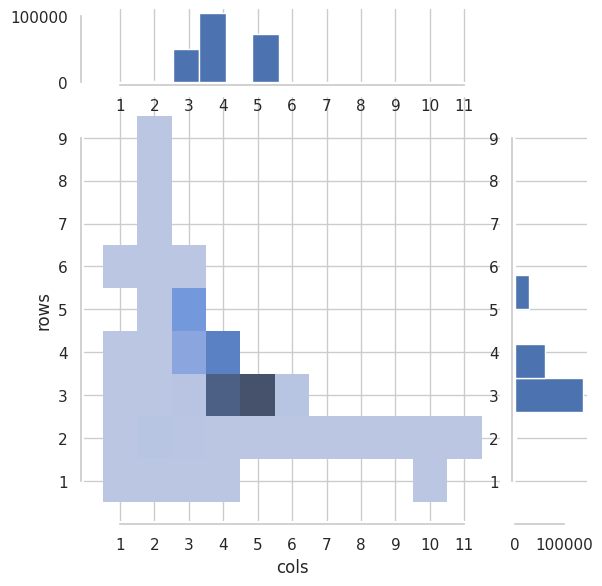

In [26]:
sns.set_theme(style="whitegrid")
g = sns.jointplot(data=ds.df, x="cols", y="rows", kind="hist", discrete=(True, True))
g.ax_marg_x.hist(ds.df["cols"], bins=13)
g.ax_marg_y.hist(ds.df["rows"], bins=10, orientation='horizontal')
g.ax_joint.set_xticks(range(1, 12))
g.ax_joint.set_yticks(range(1, 10))
sns.despine(trim=True, offset=2)

In [4]:
ds._update_min_dimensions()

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Dropping 0 rows


In [7]:
ds.df = (
            ds.df
            .reset_index(drop=True)
            .astype(
                {
                    "min_width": "int16",
                    "min_height": "int16",
                    "max_width": "int16",
                    "max_height": "int16",
                    "width": "int16",
                    "height": "int16",
                    "rows": "uint8",
                    "cols": "uint8",
                    "image_id": str,
                    "class_id": str,
                    "num_sample": "uint32",
                    "stochastic_nub": "bool",
                }
            )
        )

In [10]:
ds.df = ds.df.drop(columns=["PredictionString"])
ds.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231653 entries, 0 to 231652
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_id        231653 non-null  object
 1   class_id        231653 non-null  object
 2   cols            231653 non-null  uint8 
 3   height          231653 non-null  int16 
 4   max_height      231653 non-null  int16 
 5   max_width       231653 non-null  int16 
 6   min_height      231653 non-null  int16 
 7   min_width       231653 non-null  int16 
 8   num_sample      231653 non-null  uint32
 9   piece_count     231653 non-null  int64 
 10  rows            231653 non-null  uint8 
 11  stochastic_nub  231653 non-null  bool  
 12  width           231653 non-null  int16 
dtypes: bool(1), int16(6), int64(1), object(2), uint32(1), uint8(2)
memory usage: 9.5+ MB


In [3]:
from data_handling import ImageNetParser
from dl_solver import Config
config = Config(is_multiproc=True)
imagenet_parser = ImageNetParser(config)
df = imagenet_parser.read_solution_csv("val").pipe(imagenet_parser.to_jigsaw, "val")

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
import pandas as pd
from pathlib import Path

In [29]:
downloads = Path("/mnt/c/Users/jandu/Downloads")
assert downloads.exists()
files = downloads.glob("*_step.csv")

In [30]:
dfs = {file.stem: pd.read_csv(file).rename(columns={"Value": file.stem}).set_index("Step") for file in files}

merged_df = pd.concat(dfs.values(), axis=1)
merged_df.head()

,Wall time,ce_loss_cols_step,Wall time,ce_loss_rot_step,Wall time,ce_loss_row_step,Wall time,mse_los_pos_step,Wall time,unique_loss_step
Step,,,,,,,,,,
7,1.715357e+09,2.381173,1.715357e+09,2.099997,1.715357e+09,1.327623,1.715357e+09,2.519276,1.715357e+09,9.970558
15,1.715357e+09,3.504081,1.715357e+09,1.403173,1.715357e+09,2.603154,1.715357e+09,2.078125,1.715357e+09,11.000000
23,1.715357e+09,3.611053,1.715357e+09,1.406617,1.715357e+09,1.478242,1.715357e+09,2.083333,1.715357e+09,11.000000
31,1.715357e+09,3.981299,1.715357e+09,1.394740,1.715357e+09,1.301174,1.715357e+09,2.072917,1.715357e+09,11.000000
39,1.715357e+09,3.889863,1.715357e+09,1.407605,1.715357e+09,1.441430,1.715357e+09,2.083333,1.715357e+09,11.000000


In [31]:
merged_df = merged_df.drop(columns=["Wall time"])

In [39]:
merged_df = merged_df.astype('float32').rename(columns={
    "ce_loss_cols_step":"ce_loss_col",
    "ce_loss_rot_step": "ce_loss_rot",
    "ce_loss_row_step": "ce_loss_row",
    "mse_los_pos_step": "mse_loss_pos",
    "unique_loss_step": "unique_loss"
})

In [54]:
merged_df.to_csv(index=True, path_or_buf=downloads / "losses.csv")

In [41]:
downloads / "losses.csv"

PosixPath('/mnt/c/Users/jandu/Downloads/losses.csv')

In [53]:
merged_df

,ce_loss_col,ce_loss_rot,ce_loss_row,mse_loss_pos,unique_loss
Step,,,,,
7,2.381173,2.099997,1.327623,2.519276,9.970558
15,3.504081,1.403173,2.603154,2.078125,11.000000
23,3.611053,1.406617,1.478242,2.083333,11.000000
31,3.981299,1.394740,1.301174,2.072917,11.000000
39,3.889863,1.407605,1.441430,2.083333,11.000000
47,3.349060,1.401031,2.243500,1.205486,7.209046
55,2.646821,1.407509,3.913473,1.083333,11.000000
63,1.924240,1.396748,1.321816,1.103810,9.433698
71,2.805701,1.411385,3.298040,1.583333,11.000000
